#TASK 1
1.The task is to identify the best promotional channel for every HCP for the upcoming week.

2.The best channel should be identified among three channels – sales rep calls, emails, and sample drops.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hcp_data = pd.read_excel("/content/drive/MyDrive/kdsh-data-solution-task-1/HCP_Data_KDAG_Hackathon/HCP_Data_KDAG_Hackathon.xlsx")

hcp_data

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist
...,...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,20200103,0.0,2.45597,0,0,3-Low,1,0,0,Dermatologist
569996,axt10000,20200110,0.0,2.38065,0,0,3-Low,0,0,0,Dermatologist
569997,axt10000,20200117,0.0,7.42171,0,0,3-Low,1,0,0,Dermatologist
569998,axt10000,20200124,0.0,5.39345,0,0,3-Low,1,0,0,Dermatologist


In [ ]:
hcp_data.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist


In [ ]:
hcp_data.tail()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
569995,axt10000,20200103,0.0,2.45597,0,0,3-Low,1,0,0,Dermatologist
569996,axt10000,20200110,0.0,2.38065,0,0,3-Low,0,0,0,Dermatologist
569997,axt10000,20200117,0.0,7.42171,0,0,3-Low,1,0,0,Dermatologist
569998,axt10000,20200124,0.0,5.39345,0,0,3-Low,1,0,0,Dermatologist
569999,axt10000,20200131,0.0,0.00000,0,0,3-Low,0,0,0,Dermatologist


In [ ]:
patient_data = pd.read_excel('/content/drive/MyDrive/kdsh-data-solution-task-1/Patient_Data_KDAG_Hackathon/Patient_Data_KDAG_Hackathon.xlsx')

In [ ]:
patient_data.head()

,Patient ID,Physician_ID,Date_of_Visit,Year of Birth,Gender,Geographical_State
0,16445,axt01951,2020-01-12,1962.0,F,ME
1,16445,axt01951,2019-09-25,1962.0,F,ME
2,16445,axt01951,2019-02-12,1962.0,F,ME
3,16445,axt01951,2019-11-07,1962.0,F,ME
4,16445,axt01951,2019-04-17,1962.0,F,ME


In [ ]:
patient_data.tail()

,Patient ID,Physician_ID,Date_of_Visit,Year of Birth,Gender,Geographical_State
724319,39834,axt08305,2020-01-08,1995.0,M,VA
724320,39850,axt09038,2019-10-01,1949.0,F,NY
724321,39850,axt09038,2019-01-31,1949.0,F,NY
724322,39850,axt09038,2019-07-07,1949.0,F,NY
724323,39850,axt09038,2019-06-09,1949.0,F,NY


In [ ]:
hcp_data.describe()

,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped
count,5.700000e+05,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000
mean,2.019150e+07,0.682828,7.988949,0.391295,0.865719,0.271174,0.005746,0.042044
std,2.693162e+03,1.369037,10.599537,0.488041,3.437103,0.710370,0.076183,0.448897
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.019072e+07,0.000000,5.081410,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.019102e+07,1.004000,10.910640,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020013e+07,64.255000,259.966980,1.000000,156.000000,8.000000,2.000000,23.000000


In [ ]:
hcp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570000 entries, 0 to 569999
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Physician_ID               570000 non-null  object 
 1   Time_Period                570000 non-null  int64  
 2   Brand_Rx                   570000 non-null  float64
 3   Market_Rx                  570000 non-null  float64
 4   Sales_Rep_Calls            570000 non-null  int64  
 5   Samples_Dropped            570000 non-null  int64  
 6   Physician_Segment          570000 non-null  object 
 7   Emails_Delivered           570000 non-null  int64  
 8   Speaker_Programs_Attended  570000 non-null  int64  
 9   Vouchers_Dropped           570000 non-null  int64  
 10  Specialty                  570000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 47.8+ MB


In [ ]:
hcp_data['Physician_ID'].value_counts()

axt00001    57
axt06671    57
axt06664    57
axt06665    57
axt06666    57
            ..
axt03334    57
axt03335    57
axt03336    57
axt03337    57
axt10000    57
Name: Physician_ID, Length: 10000, dtype: int64

In [ ]:
hcp_data.value_counts('Sales_Rep_Calls')

Sales_Rep_Calls
0    346962
1    223038
dtype: int64

In [ ]:
hcp_data['Sales_Rep_Calls_01'] = hcp_data['Sales_Rep_Calls']
hcp_data.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist,1,0,0
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist,1,0,0
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist,1,0,0
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist,1,1,0
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist,1,0,0


In [ ]:
hcp_data.value_counts('Samples_Dropped')

Samples_Dropped
0      511424
6        9529
4        7081
2        6040
3        6024
        ...  
76          1
74          1
70          1
65          1
156         1
Length: 81, dtype: int64

In [ ]:
hcp_data['Samples_Dropped_01'] = hcp_data['Samples_Dropped']
hcp_data['Samples_Dropped_01'] = np.where(hcp_data['Samples_Dropped_01'] != 0, 1, hcp_data['Samples_Dropped_01'])
hcp_data.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist,1,0,0
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist,1,0,0
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist,1,0,0
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist,1,1,0
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist,1,0,0


In [ ]:
hcp_data['Samples_Dropped_01'].value_counts()

0    511424
1     58576
Name: Samples_Dropped_01, dtype: int64

In [ ]:
samples_dropped_sum = hcp_data['Samples_Dropped'].sum()
samples_dropped_sum

493460

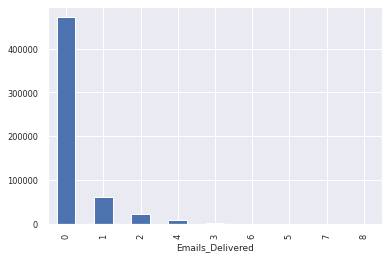

In [ ]:
hcp_data.value_counts('Emails_Delivered').plot.bar()

In [ ]:
emails_delivered_sum = hcp_data['Emails_Delivered'].sum()
emails_delivered_sum

154569

In [ ]:
hcp_data['Emails_Delivered_01'] = hcp_data['Emails_Delivered']
hcp_data['Emails_Delivered_01'] = np.where(hcp_data['Emails_Delivered_01'] != 0, 1, hcp_data['Emails_Delivered_01'])
hcp_data.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist,1,0,0
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist,1,0,0
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist,1,0,0
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist,1,1,0
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist,1,0,0


In [ ]:
hcp_data.tail()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
569995,axt10000,20200103,0.0,2.45597,0,0,3-Low,1,0,0,Dermatologist,0,0,1
569996,axt10000,20200110,0.0,2.38065,0,0,3-Low,0,0,0,Dermatologist,0,0,0
569997,axt10000,20200117,0.0,7.42171,0,0,3-Low,1,0,0,Dermatologist,0,0,1
569998,axt10000,20200124,0.0,5.39345,0,0,3-Low,1,0,0,Dermatologist,0,0,1
569999,axt10000,20200131,0.0,0.00000,0,0,3-Low,0,0,0,Dermatologist,0,0,0


In [ ]:
hcp_data['Emails_Delivered_01'].value_counts()

0    472071
1     97929
Name: Emails_Delivered_01, dtype: int64

In [ ]:
 hcp_data.value_counts('Speaker_Programs_Attended')

Speaker_Programs_Attended
0    566751
1      3223
2        26
dtype: int64

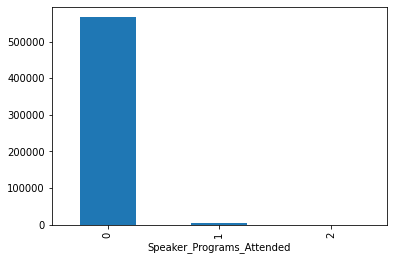

In [ ]:
hcp_data.value_counts('Speaker_Programs_Attended').plot.bar()

In [ ]:
speaker_programs_sum = hcp_data['Speaker_Programs_Attended'].sum()
speaker_programs_sum

3275

In [ ]:
hcp_data.value_counts('Vouchers_Dropped')

Vouchers_Dropped
0     563103
2       1950
4       1257
5       1241
1        972
3        836
6        194
8        145
10       140
9         62
7         49
12        13
14         9
13         7
15         7
11         4
20         4
16         3
18         3
23         1
dtype: int64

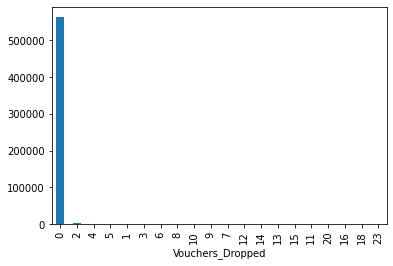

In [ ]:
hcp_data.value_counts('Vouchers_Dropped').plot.bar()

In [ ]:
vouchers_dropped_sum = hcp_data['Vouchers_Dropped'].sum()
vouchers_dropped_sum

23965

In [ ]:
 hcp_data.isnull().sum()

Physician_ID                 0
Time_Period                  0
Brand_Rx                     0
Market_Rx                    0
Sales_Rep_Calls              0
Samples_Dropped              0
Physician_Segment            0
Emails_Delivered             0
Speaker_Programs_Attended    0
Vouchers_Dropped             0
Specialty                    0
Sales_Rep_Calls_01           0
Samples_Dropped_01           0
Emails_Delivered_01          0
dtype: int64

In [ ]:
hcp_data['Physician_Segment'].value_counts()

3-Low       252966
2-Medium    187302
1-High      129732
Name: Physician_Segment, dtype: int64

In [ ]:
hcp_data['Brand_Rx'].describe()

count    570000.000000
mean          0.682828
std           1.369037
min           0.000000
25%           0.000000
50%           0.000000
75%           1.004000
max          64.255000
Name: Brand_Rx, dtype: float64

In [ ]:
hcp_data['Brand_Rx'].max()

64.255

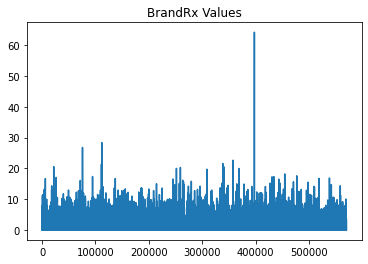

In [ ]:
plt.plot(hcp_data['Brand_Rx'])
plt.title('BrandRx Values')
plt.show()

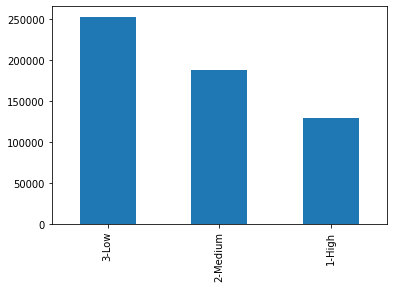

In [ ]:
hcp_data['Physician_Segment'].value_counts().plot.bar()

In [ ]:
hcp_data['Specialty'].value_counts()

Dermatologist         456798
General Physician      90687
Nurse Practitioner     22515
Name: Specialty, dtype: int64

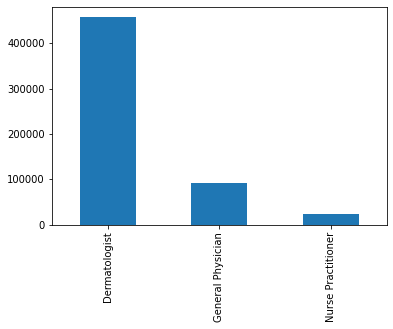

In [ ]:
hcp_data['Specialty'].value_counts().plot.bar()

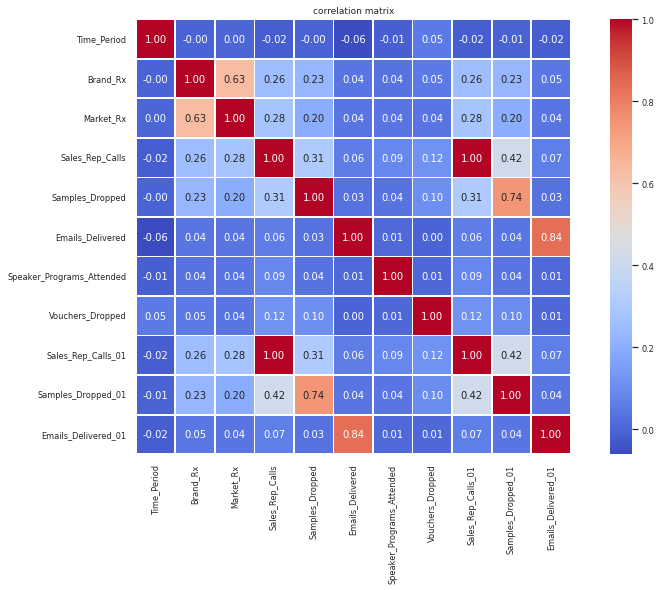

In [ ]:
plt.figure(figsize = (14,8))
sns.set(font_scale=0.75)
sns.heatmap(hcp_data.corr().round(3), annot=True, square = True, \
    linewidths=.75, cmap="coolwarm", fmt = ".2f", annot_kws = {"size": 10} )
plt.title("correlation matrix")
plt.show()

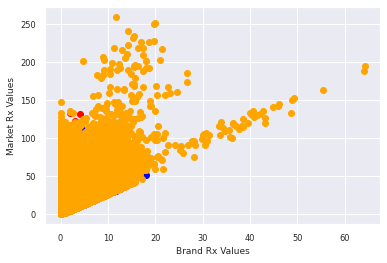

In [ ]:
colors = ['red', 'blue', 'orange']
segment = ['3-Low', '2-Medium', '1-High']

for i in range(3):
    x=hcp_data[hcp_data["Physician_Segment"]==segment[i]]
    plt.scatter(x['Brand_Rx'], x['Market_Rx'], c=colors[i])
    
plt.xlabel('Brand Rx Values')
plt.ylabel('Market Rx Values')
plt.show()

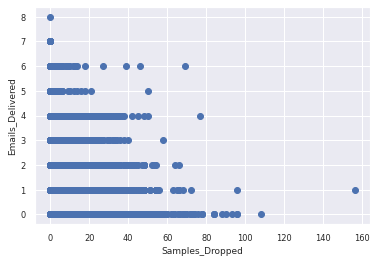

In [ ]:
plt.scatter(x=hcp_data['Samples_Dropped'], y=hcp_data['Emails_Delivered'])
plt.xlabel('Samples_Dropped')
plt.ylabel('Emails_Delivered')
plt.show()

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 739 kB/s 


In [ ]:
from category_encoders import OrdinalEncoder 

maplist = [{'col': 'Physician_Segment', 'mapping': {'3-Low': 1, '2-Medium': 2,'1-High': 3}}]
oe = OrdinalEncoder(mapping=maplist)

In [ ]:
hcp_data_1 = oe.fit_transform(hcp_data)
hcp_data_1.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
0,axt00001,20190104,0.0,2.80567,1,0,1,0,0,0,Dermatologist,1,0,0
1,axt00001,20190111,0.0,20.57312,1,0,1,0,0,0,Dermatologist,1,0,0
2,axt00001,20190118,0.0,6.16010,1,0,1,0,0,0,Dermatologist,1,0,0
3,axt00001,20190125,0.0,8.95501,1,5,1,0,0,0,Dermatologist,1,1,0
4,axt00001,20190201,0.0,9.13793,1,0,1,0,0,0,Dermatologist,1,0,0


In [ ]:
list2 = [{'col': 'Specialty', 'mapping': {'Dermatologist': 1, 'General Physician': 2,'Nurse Practitioner': 3}}]
oe = OrdinalEncoder(mapping=list2)

hcp_data_1 = oe.fit_transform(hcp_data_1)
hcp_data_1.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
0,axt00001,20190104,0.0,2.80567,1,0,1,0,0,0,1,1,0,0
1,axt00001,20190111,0.0,20.57312,1,0,1,0,0,0,1,1,0,0
2,axt00001,20190118,0.0,6.16010,1,0,1,0,0,0,1,1,0,0
3,axt00001,20190125,0.0,8.95501,1,5,1,0,0,0,1,1,1,0
4,axt00001,20190201,0.0,9.13793,1,0,1,0,0,0,1,1,0,0


In [ ]:
hcp_data_1.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
0,axt00001,20190104,0.0,2.80567,1,0,1,0,0,0,1,1,0,0
1,axt00001,20190111,0.0,20.57312,1,0,1,0,0,0,1,1,0,0
2,axt00001,20190118,0.0,6.16010,1,0,1,0,0,0,1,1,0,0
3,axt00001,20190125,0.0,8.95501,1,5,1,0,0,0,1,1,1,0
4,axt00001,20190201,0.0,9.13793,1,0,1,0,0,0,1,1,0,0


In [ ]:
hcp_data_1 = hcp_data_1.drop(columns = ['Speaker_Programs_Attended', 'Vouchers_Dropped', 'Specialty'])
hcp_data_1

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
0,axt00001,20190104,0.0,2.80567,1,0,1,0,1,0,0
1,axt00001,20190111,0.0,20.57312,1,0,1,0,1,0,0
2,axt00001,20190118,0.0,6.16010,1,0,1,0,1,0,0
3,axt00001,20190125,0.0,8.95501,1,5,1,0,1,1,0
4,axt00001,20190201,0.0,9.13793,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,20200103,0.0,2.45597,0,0,1,1,0,0,1
569996,axt10000,20200110,0.0,2.38065,0,0,1,0,0,0,0
569997,axt10000,20200117,0.0,7.42171,0,0,1,1,0,0,1
569998,axt10000,20200124,0.0,5.39345,0,0,1,1,0,0,1


In [ ]:
#train test split
#min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

hcp_data_1['Brand_Rx_minmax'] = MinMaxScaler().fit_transform(hcp_data_1['Brand_Rx'].values.reshape(-1,1))
X = hcp_data_1.iloc[:, -1:]
y =hcp_data_1.iloc[:, 8:11]

In [ ]:
y

,Sales_Rep_Calls_01,Samples_Dropped_01,Emails_Delivered_01
0,1,0,0
1,1,0,0
2,1,0,0
3,1,1,0
4,1,0,0
...,...,...,...
569995,0,0,1
569996,0,0,0
569997,0,0,1
569998,0,0,1


In [ ]:
#training the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

categories = ['Sales_Rep_Calls_01', 'Samples_Dropped_01', 'Emails_Delivered_01']
accuracy =[]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X & y
    rf_model.fit(X_train, y_train[category])
    # compute the testing accuracy
    y_pred = rf_model.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], y_pred)))
    accuracy.append((accuracy_score(y_test[category], y_pred)))

... Processing Sales_Rep_Calls_01
Test accuracy is 0.6584122807017544
... Processing Samples_Dropped_01
Test accuracy is 0.8950350877192983
... Processing Emails_Delivered_01
Test accuracy is 0.8243421052631579


In [ ]:
accuracy

[0.6584122807017544, 0.8950350877192983, 0.8243421052631579]

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
len(y_pred)

114000

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    knn_model.fit(X_train, y_train[category])
    # compute the testing accuracy
    y_pred = knn_model.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], y_pred)))

... Processing Sales_Rep_Calls_01
Test accuracy is 0.6528070175438596
... Processing Samples_Dropped_01
Test accuracy is 0.8966315789473684
... Processing Emails_Delivered_01
Test accuracy is 0.8259473684210527


In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB() 
for category in categories:
    print('... Processing {}'.format(category))
    classifier.fit(X_train, y_train[category])
    y_pred_nb = classifier.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], y_pred_nb)))

... Processing Sales_Rep_Calls_01
Test accuracy is 0.6104385964912281
... Processing Samples_Dropped_01
Test accuracy is 0.8973859649122807
... Processing Emails_Delivered_01
Test accuracy is 0.8252894736842106


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

labels = ['Sales_Rep_Calls_01', 'Samples_Dropped_01', 'Emails_Delivered_01']
selected_features = [] 
for label in labels:
    selector = SelectKBest(chi2, k='all')
    selector.fit(X_train, y_train[label])
    selected_features.append(list(selector.scores_))



# MeanCS 
selected_features = np.mean(selected_features, axis=0) 
print(f'Selcted features for mean: {selected_features}')
# MaxCS
selected_features = np.max(selected_features, axis=0) 
print(f'Selcted features for max: {selected_features}')

Selcted features for mean: [784.74391394]
Selcted features for max: 784.7439139361892


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
print(model.feature_importances_)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

[1.]


0.5138684210526315

In [ ]:
hcp_data_1.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Samples_Dropped_01,Emails_Delivered_01,Sales_Rep_Calls_01,Brand_Rx_minmax
0,axt00001,20190104,0.0,2.80567,1,0,1,0,0,0,1,0.0
1,axt00001,20190111,0.0,20.57312,1,0,1,0,0,0,1,0.0
2,axt00001,20190118,0.0,6.16010,1,0,1,0,0,0,1,0.0
3,axt00001,20190125,0.0,8.95501,1,5,1,0,1,0,1,0.0
4,axt00001,20190201,0.0,9.13793,1,0,1,0,0,0,1,0.0


In [ ]:
y_pred

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('prediction.csv')
prediction

In [ ]:
predictions = pd.read_csv('prediction.csv')
predictions

,Unnamed: 0,predictions
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
113995,113995,0
113996,113996,0
113997,113997,0
113998,113998,0
